<a href="https://colab.research.google.com/github/RaiderG0d/AAA/blob/main/AAA2425__P1_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Machine Learning
## Project 1: Bayesian Networks
## Group 4

Fatma Özel, nº 57037 <br>
Nuno Costa, nº 58635


## Introduction

## 1. Exploratory data analysis

**Data Distribution Analysis**

The first step in our analysis was to explore the dataset by examining the distribution of each variable. This was achieved by calculating the percentage proportions of unique values for each variable, providing insights into their relative frequencies.

In [2]:
import pandas as pd

# Load your CSV data into a DataFrame (replace with the actual path to your file)
df = pd.read_csv('cardiovascular_train.csv')

# Create an empty dictionary to store the percentage tables
percentage_tables = {}

# For each column, calculate the percentage of each unique value
for column in df.columns:
    percentage_tables[column] = df[column].value_counts(normalize=True) * 100

# Create a Styler for each table with color formatting
styled_tables = {}

# For each column, style the percentage table with a color gradient
for column, table in percentage_tables.items():
    # Convert the series to a DataFrame and apply background gradient
    styled_tables[column] = table.to_frame().style.background_gradient(cmap='Blues')

# Display the tables with color (This works in Jupyter Notebooks or environments that support display())
for column, styled_table in styled_tables.items():
    print(f"Styled table for {column}:")
    display(styled_table)  # This will render the table with colors in a Jupyter environment

Styled table for Age:


,proportion
Age,
34-44,36.697009
44-54,29.856957
24-34,17.035111
54-64,15.448635
18-24,0.728218
64-74,0.234070


Styled table for Anxiety:


,proportion
Anxiety,
No,89.830949
Yes,10.169051


Styled table for BodyMassIndex:


,proportion
BodyMassIndex,
Overweight,37.451235
Normal,34.954486
Obese,25.175553
Underweight,2.418726


Styled table for Depression:


,proportion
Depression,
No,99.453836
Yes,0.546164


Styled table for Diabetes:


,proportion
Diabetes,
No,95.422627
Yes,4.577373


Styled table for EducationLevel:


,proportion
EducationLevel,
2,75.786736
3,24.083225
1,0.130039


Styled table for Hypercholesterolemia:


,proportion
Hypercholesterolemia,
No,61.144343
Yes,38.855657


Styled table for Hypertension:


,proportion
Hypertension,
No,80.806242
Yes,19.193758


Styled table for PhysicalActivity:


,proportion
PhysicalActivity,
Insufficiently Active,72.041612
Regularly Active,27.958388


Styled table for Sex:


,proportion
Sex,
Male,68.088427
Female,31.911573


Styled table for SleepDuration:


,proportion
SleepDuration,
6-9hours,89.466840
<6hours,10.429129
>9hours,0.104031


Styled table for SmokerProfile:


,proportion
SmokerProfile,
Non_Smoker,56.566970
Smoker,26.996099
Ex_Smoker,16.436931


Styled table for SocioeconomicStatus:


,proportion
SocioeconomicStatus,
3,36.540962
2,32.405722
1,31.053316


Below are the highlights for each variable, summarizing the proportions:
* Age: The largest group of participants fell within the 34–44 age range (36.7%), while the 64–74 age range represented a minimal proportion (0.23%).
* Anxiety: The majority (89.83%) reported no anxiety, while 10.17% reported anxiety.
* Body Mass Index (BMI): Most participants were overweight (37.45%) or had a normal BMI (34.95%), while only 2.42% were underweight.
* Depression: A significant majority (99.45%) reported no depression.
* Diabetes: 95.42% reported no diabetes, while 4.58% reported having diabetes.
* Education Level: The majority (75.79%) had an education level of 2, with very few reporting level 1 (0.13%).
* Hypercholesterolemia: 61.14% reported no hypercholesterolemia, while 38.86% reported having it.
* Hypertension: 80.81% reported no hypertension, with 19.19% reporting hypertension.
* Physical Activity: 72.04% were insufficiently active, while 27.96% were regularly active.
* Sex: The dataset was predominantly male (68.09%).
* Sleep Duration: Most participants (89.47%) reported sleeping 6–9 hours, with very few exceeding 9 hours (0.1%).
* Smoker Profile: 56.57% were non-smokers, 26.99% were smokers, and 16.44% were ex-smokers.
* Socioeconomic Status: Participants were distributed fairly evenly across the three socioeconomic levels, with the highest proportion in level 3 (36.54%).


### 2. Learn a Bayesian network from the data

To learn the structure and parameters of a Bayesian network, we applied techniques introduced in our coursework. For structure learning, we employed a data-driven approach using scoring metrics and heuristic search algorithms. The choice of techniques was guided by the complexity of the dataset and the goals of the project. Below, we detail our methodology and the rationale behind key decisions.

**Exhaustive Search** is unsuitable for the project's requirements as it is only feasible for smaller networks due to its high computational complexity. This method tests all possible combinations of nodes, but in a network of this scale, the number of combinations would reach billions, making it impractical. Therefore, the **Hill Climbing** algorithm was chosen as a more practical and efficient alternative.


**Structure Learning**

Scoring Metrics: Evaluation and Selection
Several scoring systems were evaluated to determine their suitability for our task:
* K2: This scoring system does not penalize complex networks, often resulting in overly connected graphs with excessive links.
* Bayesian Information Criterion (BIC): While BIC penalizes complex networks heavily, it was found to oversimplify the structure, even removing significant nodes like "Depression" in some cases to simplify the network.
* Akaike Information Criterion (AIC): AIC is less stringent than BIC in penalizing complexity, resulting in a more connected network, but it still produced fewer links than expected based on domain knowledge.
* Bayesian Dirichlet Scores (BDS and BDeu):
After research and experimentation, we chose BDeu for its simplicity and robustness. Unlike BDS, which requires specifying priors and is computationally intensive, BDeu assumes uniformity and is ideal for exploratory learning of Bayesian networks when strong prior beliefs are unavailable. This made BDeu the most appropriate choice for our automated and data-driven approach.


**Network Generation:** <br>
To optimize the structure, we implemented a Python script that tested network configurations by varying the connection threshold across a range from 0 (fully disconnected) to 1 (fully connected) in increments of 0.1. This process produced 10 candidate networks, which were evaluated based on their BDeu scores. The network with the highest score was selected as the final model.




In [4]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.2 MB/s eta 0:00:00



-------------------------------------------------------------------
This is the x 0


  0%|          | 0/1000000 [00:00<?, ?it/s]

Edges: [('Sex', 'Anxiety'), ('Sex', 'PhysicalActivity'), ('PhysicalActivity', 'Hypertension'), ('Age', 'PhysicalActivity'), ('Age', 'Hypercholesterolemia'), ('Age', 'SocioeconomicStatus'), ('Age', 'SleepDuration'), ('Hypercholesterolemia', 'Hypertension'), ('Hypercholesterolemia', 'SleepDuration'), ('Hypercholesterolemia', 'Sex'), ('SleepDuration', 'EducationLevel'), ('SleepDuration', 'Depression'), ('EducationLevel', 'SocioeconomicStatus'), ('EducationLevel', 'Depression'), ('BodyMassIndex', 'Age'), ('BodyMassIndex', 'Hypertension'), ('BodyMassIndex', 'SocioeconomicStatus'), ('Hypertension', 'Anxiety'), ('SmokerProfile', 'Age'), ('SmokerProfile', 'BodyMassIndex'), ('SmokerProfile', 'PhysicalActivity'), ('SmokerProfile', 'Hypercholesterolemia'), ('Diabetes', 'PhysicalActivity')]
Len of edges: 23
BDeu Score: -31580.523755600116


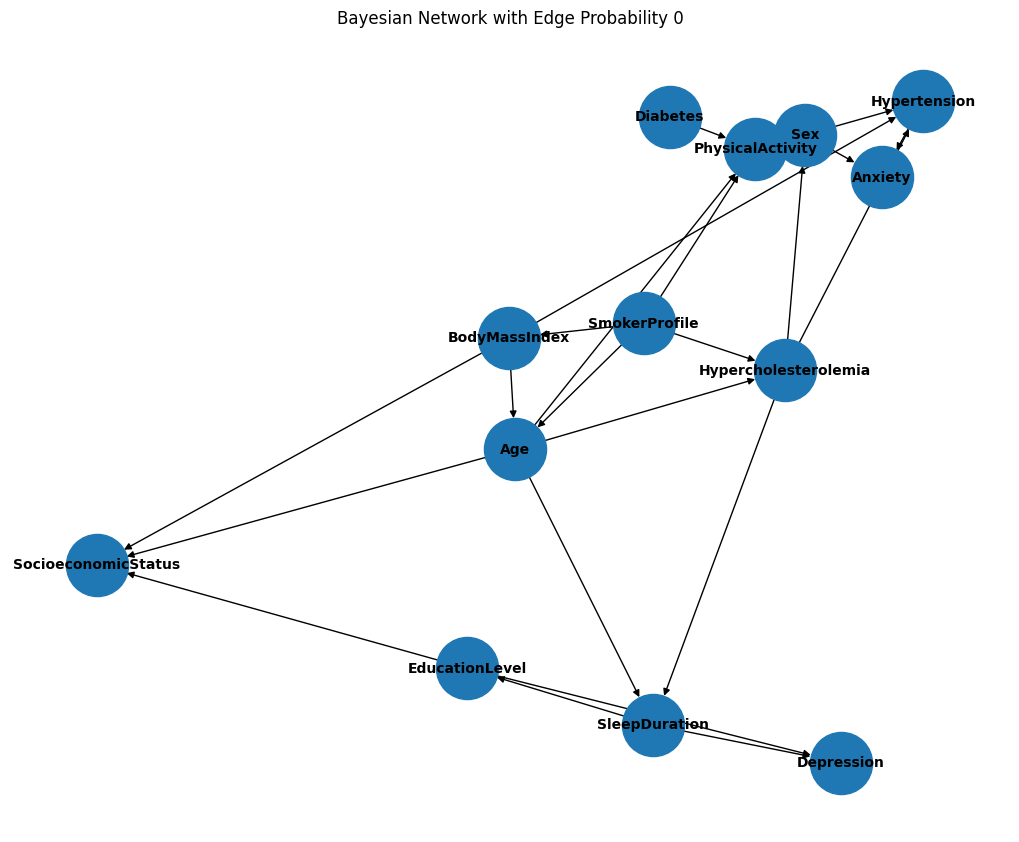


-------------------------------------------------------------------
This is the x 0.1


  0%|          | 0/1000000 [00:00<?, ?it/s]

Edges: [('Sex', 'PhysicalActivity'), ('PhysicalActivity', 'Hypertension'), ('PhysicalActivity', 'EducationLevel'), ('Age', 'PhysicalActivity'), ('Age', 'SocioeconomicStatus'), ('Age', 'SleepDuration'), ('SleepDuration', 'Anxiety'), ('SleepDuration', 'Hypertension'), ('SleepDuration', 'Depression'), ('EducationLevel', 'SocioeconomicStatus'), ('BodyMassIndex', 'Hypertension'), ('BodyMassIndex', 'Age'), ('BodyMassIndex', 'SocioeconomicStatus'), ('Hypertension', 'Hypercholesterolemia'), ('Anxiety', 'Sex'), ('Depression', 'EducationLevel'), ('SmokerProfile', 'Age'), ('SmokerProfile', 'BodyMassIndex'), ('SmokerProfile', 'PhysicalActivity'), ('SmokerProfile', 'Hypercholesterolemia'), ('Diabetes', 'PhysicalActivity')]
Len of edges: 21
BDeu Score: -31620.465295121434


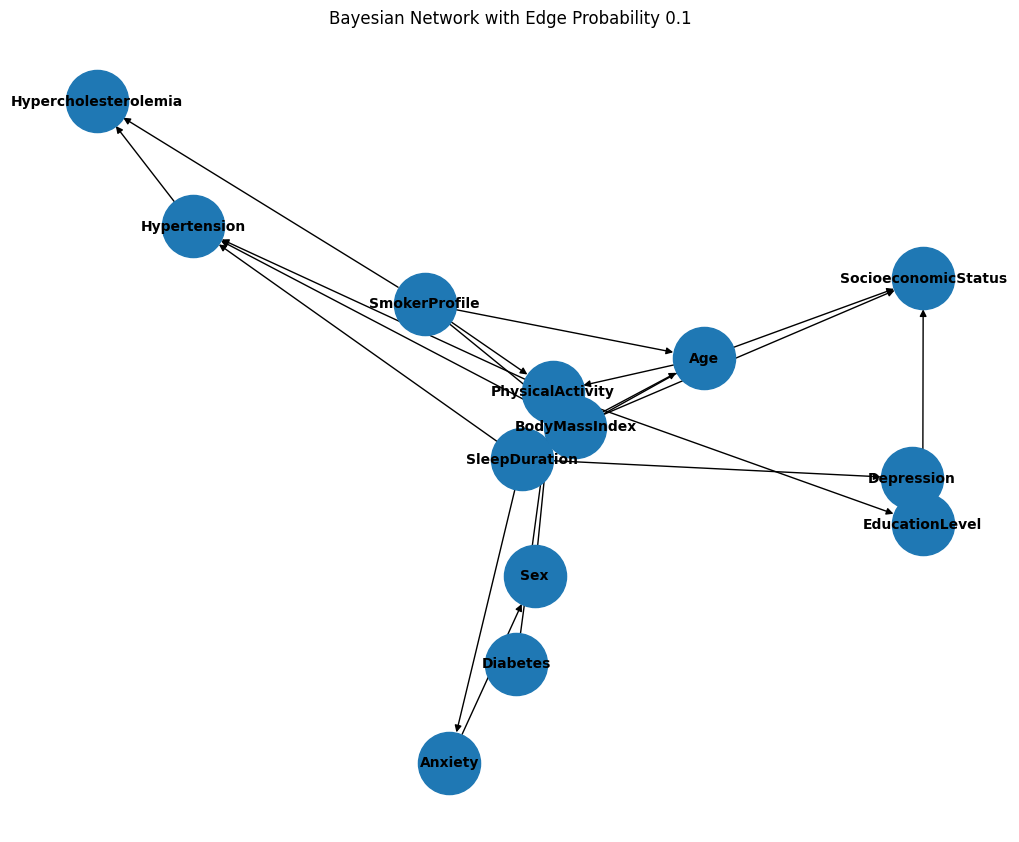


-------------------------------------------------------------------
This is the x 0.2


  0%|          | 0/1000000 [00:00<?, ?it/s]

Edges: [('Sex', 'Anxiety'), ('Sex', 'PhysicalActivity'), ('Sex', 'Diabetes'), ('PhysicalActivity', 'Hypertension'), ('PhysicalActivity', 'Diabetes'), ('PhysicalActivity', 'EducationLevel'), ('Age', 'PhysicalActivity'), ('Age', 'SocioeconomicStatus'), ('Age', 'Diabetes'), ('Age', 'SleepDuration'), ('SleepDuration', 'Hypertension'), ('SleepDuration', 'Depression'), ('EducationLevel', 'SocioeconomicStatus'), ('BodyMassIndex', 'Age'), ('BodyMassIndex', 'Hypertension'), ('BodyMassIndex', 'SocioeconomicStatus'), ('Hypertension', 'Hypercholesterolemia'), ('Hypertension', 'Anxiety'), ('Depression', 'EducationLevel'), ('SmokerProfile', 'Age'), ('SmokerProfile', 'BodyMassIndex'), ('SmokerProfile', 'PhysicalActivity'), ('SmokerProfile', 'Hypercholesterolemia'), ('Hypercholesterolemia', 'Diabetes')]
Len of edges: 24
BDeu Score: -31567.716162580393


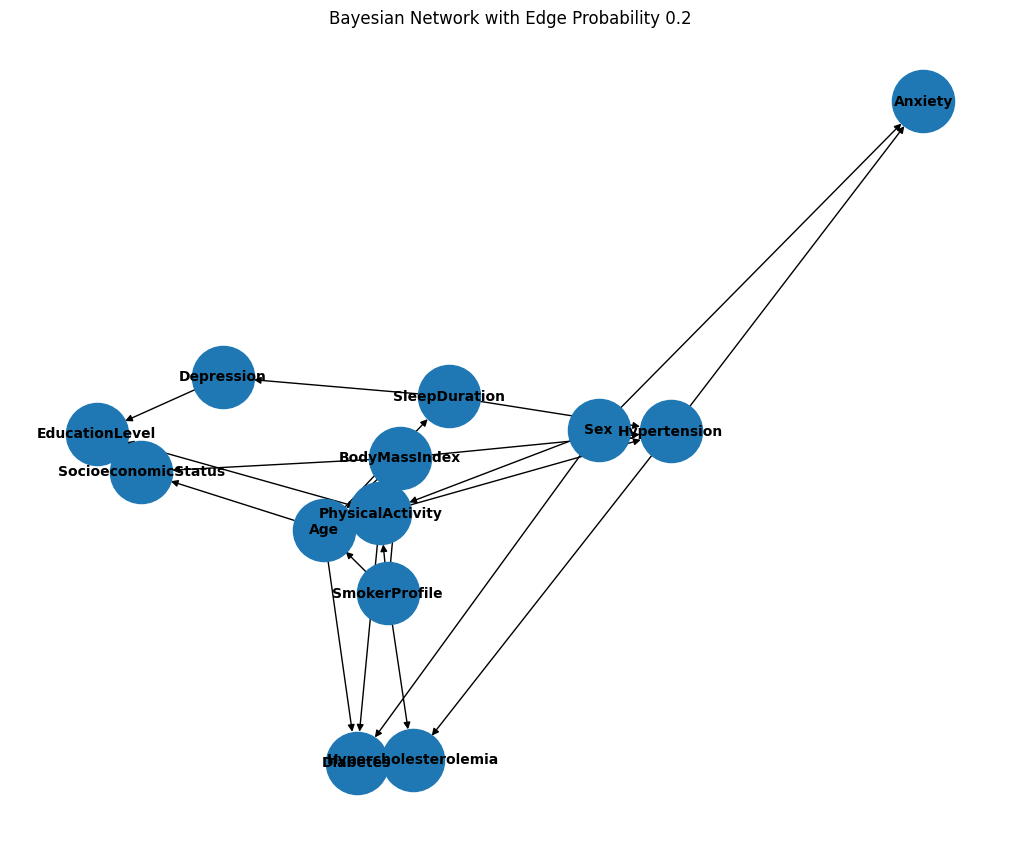


-------------------------------------------------------------------
This is the x 0.30000000000000004


  0%|          | 0/1000000 [00:00<?, ?it/s]

Edges: [('Sex', 'SocioeconomicStatus'), ('Sex', 'PhysicalActivity'), ('Sex', 'Diabetes'), ('Sex', 'Anxiety'), ('SocioeconomicStatus', 'BodyMassIndex'), ('PhysicalActivity', 'Hypertension'), ('PhysicalActivity', 'Diabetes'), ('PhysicalActivity', 'SmokerProfile'), ('Age', 'PhysicalActivity'), ('Age', 'SmokerProfile'), ('Age', 'BodyMassIndex'), ('Age', 'SocioeconomicStatus'), ('Age', 'Diabetes'), ('SmokerProfile', 'Hypercholesterolemia'), ('BodyMassIndex', 'SmokerProfile'), ('BodyMassIndex', 'Hypertension'), ('EducationLevel', 'SleepDuration'), ('EducationLevel', 'Depression'), ('EducationLevel', 'BodyMassIndex'), ('SleepDuration', 'Depression'), ('SleepDuration', 'Age'), ('SleepDuration', 'Hypertension'), ('Hypertension', 'Hypercholesterolemia'), ('Hypertension', 'Anxiety'), ('Hypercholesterolemia', 'Diabetes')]
Len of edges: 25
BDeu Score: -31608.61767125536


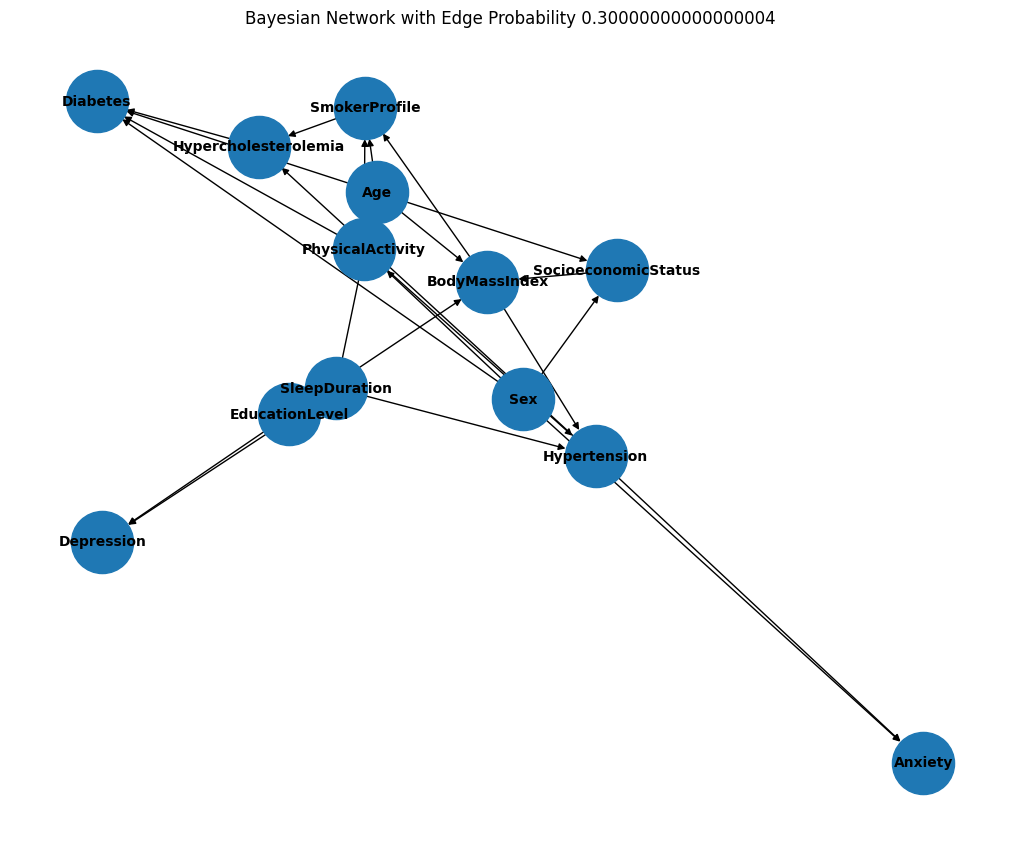


-------------------------------------------------------------------
This is the x 0.4


  0%|          | 0/1000000 [00:00<?, ?it/s]

Edges: [('Sex', 'Anxiety'), ('Sex', 'PhysicalActivity'), ('Sex', 'Diabetes'), ('PhysicalActivity', 'Hypertension'), ('PhysicalActivity', 'Diabetes'), ('PhysicalActivity', 'EducationLevel'), ('Age', 'SocioeconomicStatus'), ('Age', 'PhysicalActivity'), ('Age', 'Hypercholesterolemia'), ('Age', 'BodyMassIndex'), ('Age', 'SmokerProfile'), ('Age', 'SleepDuration'), ('Age', 'Diabetes'), ('Hypercholesterolemia', 'Hypertension'), ('Hypercholesterolemia', 'SleepDuration'), ('Hypercholesterolemia', 'Sex'), ('Hypercholesterolemia', 'Diabetes'), ('BodyMassIndex', 'SmokerProfile'), ('BodyMassIndex', 'SocioeconomicStatus'), ('BodyMassIndex', 'Hypertension'), ('SmokerProfile', 'Hypercholesterolemia'), ('SmokerProfile', 'PhysicalActivity'), ('SleepDuration', 'Depression'), ('EducationLevel', 'SocioeconomicStatus'), ('Hypertension', 'Anxiety'), ('Depression', 'EducationLevel')]
Len of edges: 26
BDeu Score: -31533.0596759987


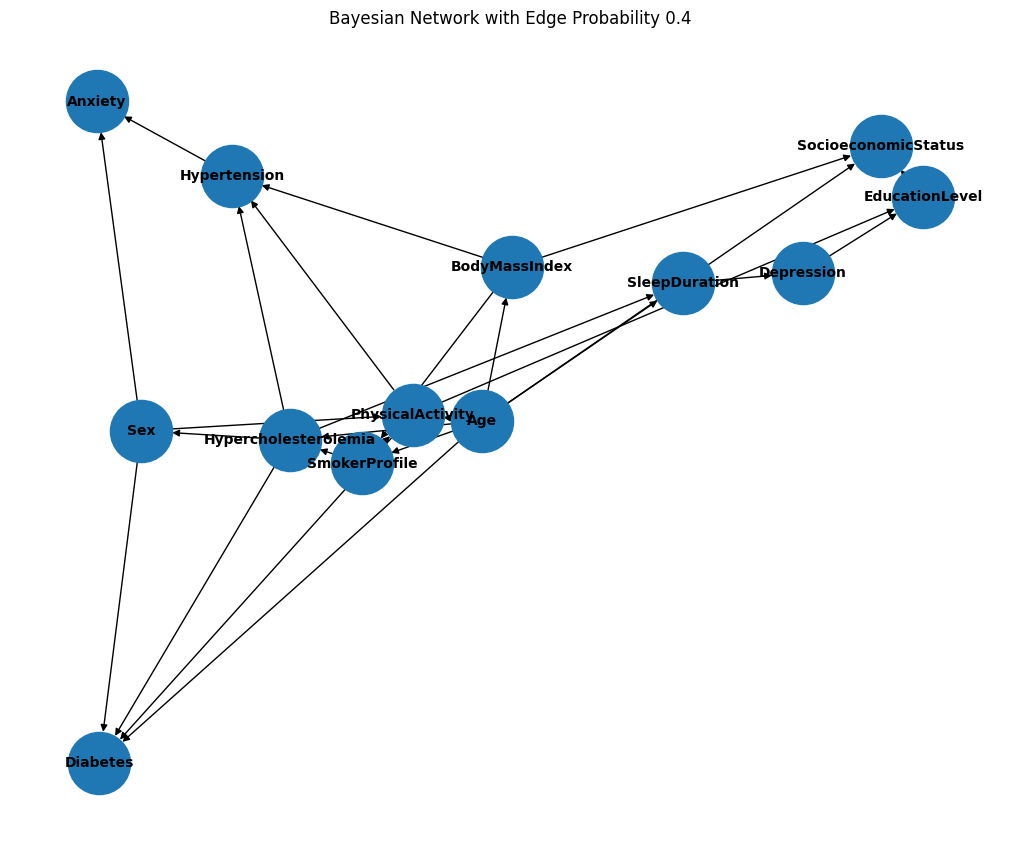


-------------------------------------------------------------------
This is the x 0.5


  0%|          | 0/1000000 [00:00<?, ?it/s]

Edges: [('Sex', 'SocioeconomicStatus'), ('Sex', 'Diabetes'), ('Sex', 'Anxiety'), ('Sex', 'PhysicalActivity'), ('SocioeconomicStatus', 'EducationLevel'), ('PhysicalActivity', 'Hypertension'), ('PhysicalActivity', 'Diabetes'), ('PhysicalActivity', 'SmokerProfile'), ('Age', 'SocioeconomicStatus'), ('Age', 'SleepDuration'), ('Age', 'SmokerProfile'), ('Age', 'Diabetes'), ('Age', 'PhysicalActivity'), ('Age', 'EducationLevel'), ('SleepDuration', 'Depression'), ('SmokerProfile', 'Hypercholesterolemia'), ('EducationLevel', 'Depression'), ('BodyMassIndex', 'Hypertension'), ('BodyMassIndex', 'Age'), ('BodyMassIndex', 'SmokerProfile'), ('BodyMassIndex', 'EducationLevel'), ('Hypertension', 'Hypercholesterolemia'), ('Hypertension', 'Anxiety'), ('Hypercholesterolemia', 'Diabetes'), ('Hypercholesterolemia', 'SleepDuration')]
Len of edges: 25
BDeu Score: -31623.97305151574


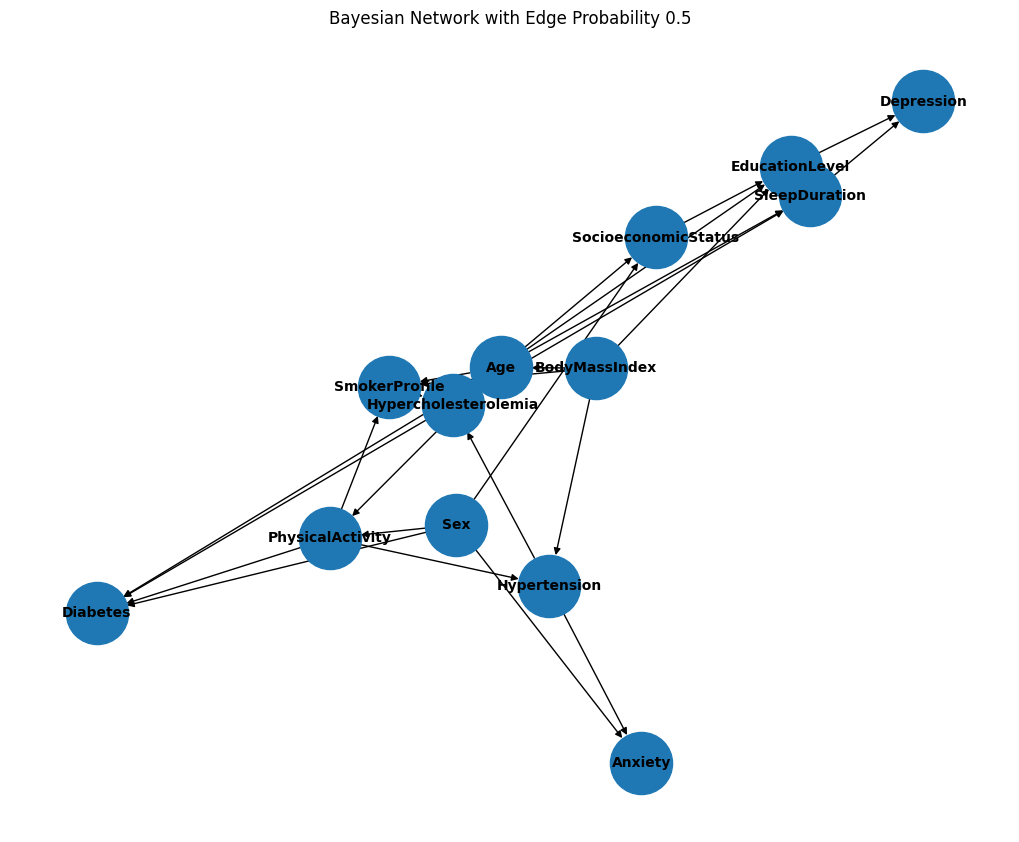


-------------------------------------------------------------------
This is the x 0.6


  0%|          | 0/1000000 [00:00<?, ?it/s]

Edges: [('Sex', 'SocioeconomicStatus'), ('Sex', 'PhysicalActivity'), ('Sex', 'Diabetes'), ('Sex', 'Anxiety'), ('SocioeconomicStatus', 'BodyMassIndex'), ('SocioeconomicStatus', 'EducationLevel'), ('PhysicalActivity', 'Depression'), ('PhysicalActivity', 'Hypertension'), ('PhysicalActivity', 'Diabetes'), ('PhysicalActivity', 'SmokerProfile'), ('Age', 'EducationLevel'), ('Age', 'BodyMassIndex'), ('Age', 'Hypercholesterolemia'), ('Age', 'Diabetes'), ('Age', 'SmokerProfile'), ('Age', 'SocioeconomicStatus'), ('Age', 'PhysicalActivity'), ('Age', 'SleepDuration'), ('EducationLevel', 'BodyMassIndex'), ('EducationLevel', 'Depression'), ('BodyMassIndex', 'SmokerProfile'), ('BodyMassIndex', 'Hypertension'), ('Hypercholesterolemia', 'Diabetes'), ('Hypercholesterolemia', 'Hypertension'), ('Hypercholesterolemia', 'Sex'), ('SleepDuration', 'Hypercholesterolemia'), ('Hypertension', 'Anxiety')]
Len of edges: 27
BDeu Score: -31584.48112731464


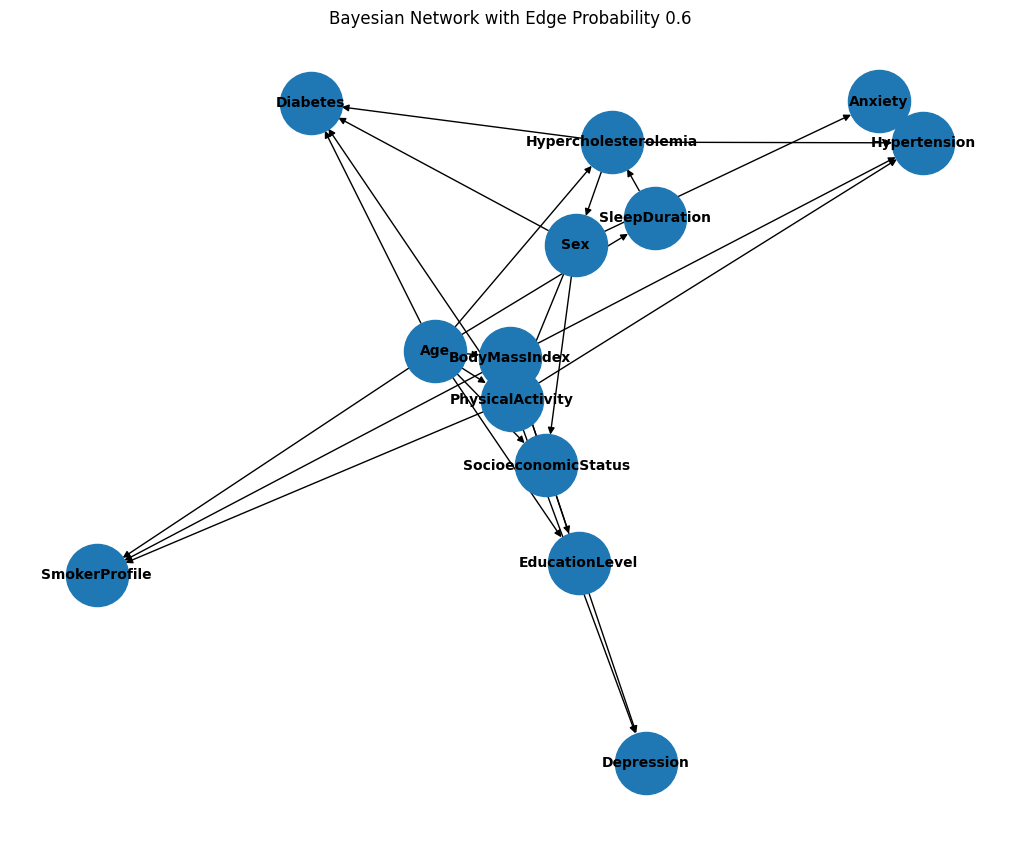


-------------------------------------------------------------------
This is the x 0.7


  0%|          | 0/1000000 [00:00<?, ?it/s]

Edges: [('Sex', 'Anxiety'), ('Sex', 'Diabetes'), ('Sex', 'PhysicalActivity'), ('PhysicalActivity', 'SmokerProfile'), ('PhysicalActivity', 'Hypertension'), ('PhysicalActivity', 'Diabetes'), ('PhysicalActivity', 'EducationLevel'), ('Age', 'SocioeconomicStatus'), ('Age', 'SleepDuration'), ('Age', 'BodyMassIndex'), ('Age', 'SmokerProfile'), ('Age', 'PhysicalActivity'), ('SleepDuration', 'Depression'), ('SleepDuration', 'Hypertension'), ('BodyMassIndex', 'SocioeconomicStatus'), ('BodyMassIndex', 'Hypertension'), ('SmokerProfile', 'Hypercholesterolemia'), ('SmokerProfile', 'BodyMassIndex'), ('EducationLevel', 'SocioeconomicStatus'), ('Hypertension', 'Hypercholesterolemia'), ('Hypertension', 'Anxiety'), ('Depression', 'EducationLevel'), ('Hypercholesterolemia', 'Diabetes')]
Len of edges: 23
BDeu Score: -31589.688745384567


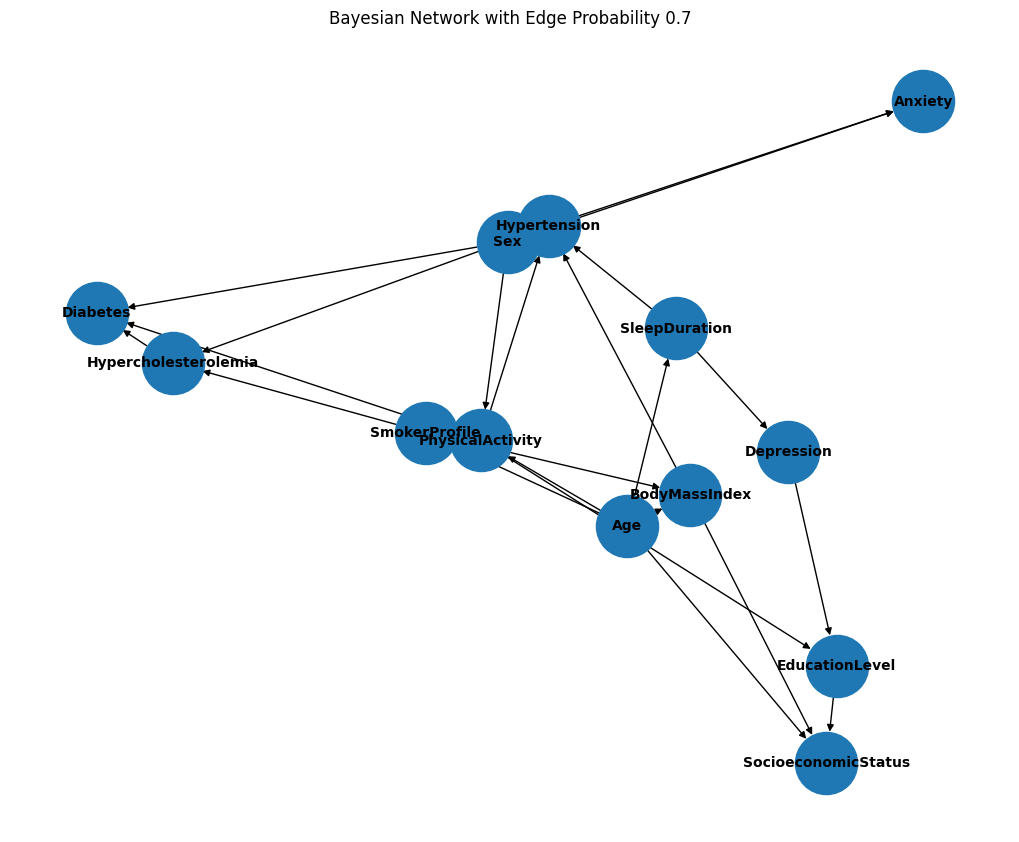


-------------------------------------------------------------------
This is the x 0.7999999999999999


  0%|          | 0/1000000 [00:00<?, ?it/s]

Edges: [('Sex', 'SocioeconomicStatus'), ('Sex', 'PhysicalActivity'), ('Sex', 'Anxiety'), ('Sex', 'Diabetes'), ('Sex', 'Hypercholesterolemia'), ('SocioeconomicStatus', 'BodyMassIndex'), ('PhysicalActivity', 'Hypertension'), ('PhysicalActivity', 'SmokerProfile'), ('PhysicalActivity', 'Diabetes'), ('Hypercholesterolemia', 'Diabetes'), ('Age', 'SocioeconomicStatus'), ('Age', 'BodyMassIndex'), ('Age', 'PhysicalActivity'), ('Age', 'SmokerProfile'), ('Age', 'Diabetes'), ('BodyMassIndex', 'SmokerProfile'), ('BodyMassIndex', 'Hypertension'), ('EducationLevel', 'BodyMassIndex'), ('EducationLevel', 'SleepDuration'), ('EducationLevel', 'Depression'), ('SleepDuration', 'Depression'), ('SleepDuration', 'Hypertension'), ('SleepDuration', 'Age'), ('Hypertension', 'Hypercholesterolemia'), ('Hypertension', 'Anxiety')]
Len of edges: 25
BDeu Score: -31614.67131149756


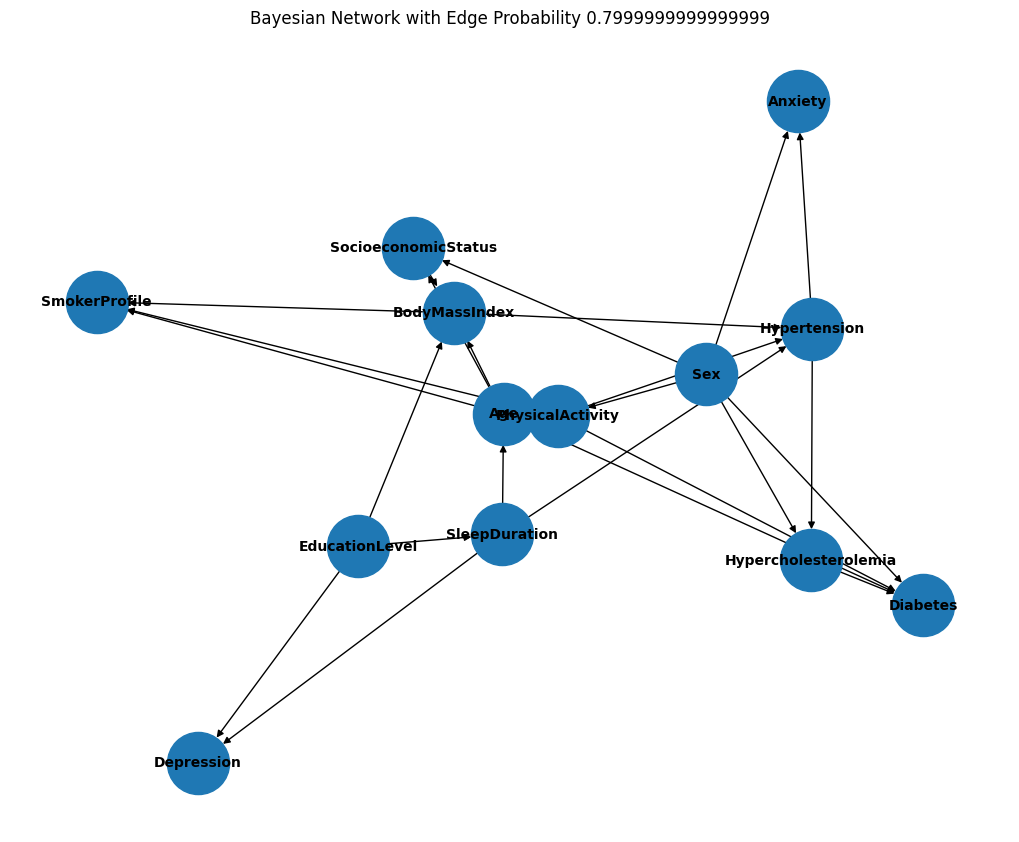


-------------------------------------------------------------------
This is the x 0.8999999999999999


  0%|          | 0/1000000 [00:00<?, ?it/s]

Edges: [('Sex', 'SocioeconomicStatus'), ('Sex', 'PhysicalActivity'), ('Sex', 'Anxiety'), ('Sex', 'Hypercholesterolemia'), ('Sex', 'Diabetes'), ('SocioeconomicStatus', 'BodyMassIndex'), ('SocioeconomicStatus', 'EducationLevel'), ('PhysicalActivity', 'SmokerProfile'), ('PhysicalActivity', 'Depression'), ('PhysicalActivity', 'Hypertension'), ('PhysicalActivity', 'Diabetes'), ('Hypercholesterolemia', 'Diabetes'), ('Age', 'SocioeconomicStatus'), ('Age', 'BodyMassIndex'), ('Age', 'PhysicalActivity'), ('Age', 'SmokerProfile'), ('BodyMassIndex', 'SmokerProfile'), ('BodyMassIndex', 'Hypertension'), ('BodyMassIndex', 'EducationLevel'), ('EducationLevel', 'Depression'), ('Depression', 'SleepDuration'), ('Hypertension', 'Hypercholesterolemia'), ('Hypertension', 'Anxiety'), ('SleepDuration', 'Hypertension')]
Len of edges: 24
BDeu Score: -31650.09598583922


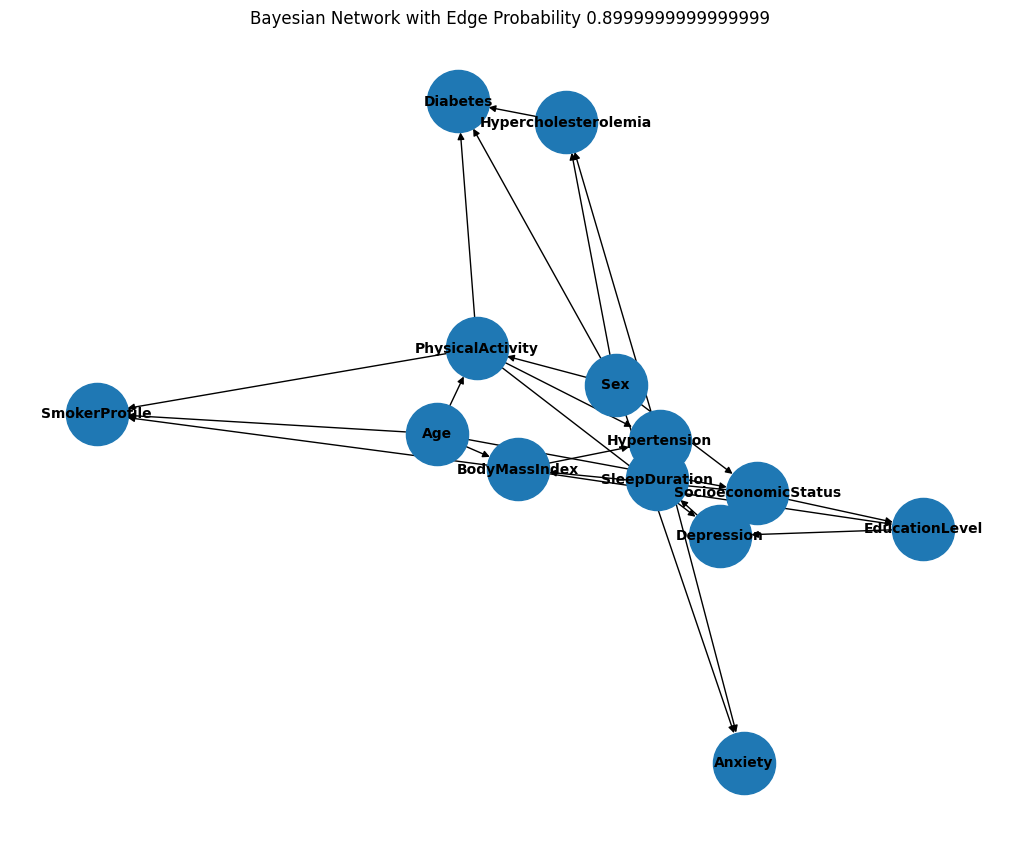


-------------------------------------------------------------------
This is the x 0.9999999999999999


  0%|          | 0/1000000 [00:00<?, ?it/s]

Edges: [('Sex', 'SocioeconomicStatus'), ('Sex', 'PhysicalActivity'), ('Sex', 'Anxiety'), ('Sex', 'Hypercholesterolemia'), ('Sex', 'Diabetes'), ('SocioeconomicStatus', 'BodyMassIndex'), ('SocioeconomicStatus', 'EducationLevel'), ('PhysicalActivity', 'SmokerProfile'), ('PhysicalActivity', 'Depression'), ('PhysicalActivity', 'Hypertension'), ('PhysicalActivity', 'Diabetes'), ('Hypercholesterolemia', 'Diabetes'), ('Age', 'SocioeconomicStatus'), ('Age', 'BodyMassIndex'), ('Age', 'PhysicalActivity'), ('Age', 'SmokerProfile'), ('BodyMassIndex', 'SmokerProfile'), ('BodyMassIndex', 'EducationLevel'), ('EducationLevel', 'Depression'), ('Depression', 'SleepDuration'), ('Hypertension', 'Hypercholesterolemia'), ('Hypertension', 'Anxiety'), ('SleepDuration', 'Hypertension')]
Len of edges: 23
BDeu Score: -31706.52409353748


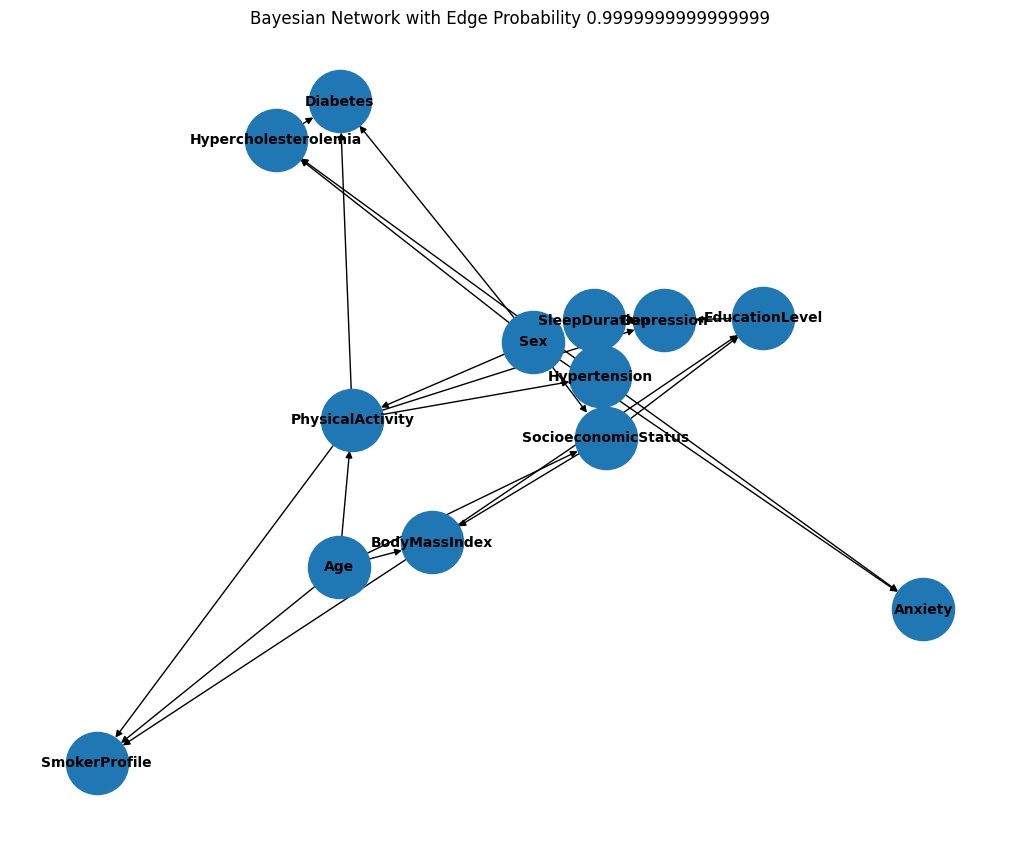

In [5]:
from pgmpy.estimators import HillClimbSearch, BDeuScore, MaximumLikelihoodEstimator
from pgmpy.models import BayesianNetwork
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from pgmpy.base import DAG

# Load the data
data = pd.read_csv('cardiovascular_train.csv')

# Function to initialize a random graph structure with given nodes and edge probability
def initialize_graph(nodes, p=1):
    G = DAG()
    G.add_nodes_from(nodes=nodes)
    init = G.get_random(n_nodes=len(nodes), edge_prob=p)
    ls = []
    mapping = {}
    for k in range(len(nodes)):
        mapping[k] = nodes[k]
    for i, j in init.edges:
        ls.append((mapping[i], mapping[j]))
    G.add_edges_from(ebunch=ls)
    return G

# Iterate to vary the edge probability in the initial graph structure
x = 0
while x < 1:
    print()
    print("-------------------------------------------------------------------")
    print('This is the x', x)

    # Initialize the Hill Climbing search with BDeu Score
    bdeu_scoring = BDeuScore(data, equivalent_sample_size=10)  # Use equivalent_sample_size instead of pseudo_counts
    es = HillClimbSearch(data)

    # Estimate the best model with initial graph based on random structure
    best_model_structure = es.estimate(scoring_method=bdeu_scoring, start_dag=initialize_graph(nodes=[
        'Sex', 'Age', 'EducationLevel', 'SocioeconomicStatus',
        'BodyMassIndex', 'PhysicalActivity', 'SleepDuration',
        'SmokerProfile', 'Anxiety', 'Depression',
        'Hypertension', 'Hypercholesterolemia', 'Diabetes'
    ], p=x))

    # Convert to a BayesianNetwork model and fit it to get CPDs
    best_model = BayesianNetwork(best_model_structure.edges())
    best_model.fit(data, estimator=MaximumLikelihoodEstimator)

    # Calculate the BDeu score (already computed during model learning)
    bdeu_score = bdeu_scoring.score(best_model)
    print('Edges:', best_model.edges())
    print('Len of edges:', len(best_model.edges()))
    print('BDeu Score:', bdeu_score)
       # Convert Bayesian network to NetworkX DiGraph for visualization
    nx_model = nx.DiGraph(best_model.edges())

    # Draw the network
    plt.figure(figsize=(10, 8))
    nx.draw(nx_model, with_labels=True, node_size=2000, font_size=10, font_color="black", font_weight="bold")
    plt.title(f"Bayesian Network with Edge Probability {x}")
    plt.show()

    x += 0.1

**Parameter Selection and Visualization**

* Threshold Selection:
 After analyzing the 10 networks generated with varying connection thresholds (x ranging from 0 to 1 in increments of 0.1), we selected x = 0.6. This value provided the best balance between connectivity and interpretability, resulting in a network that captured the most relevant relationships without adding excessive or redundant links.
* Network Visualization:
 To visualize the selected network, we used the PyGraphviz library, which allowed us to create a clear and intuitive graph representing the nodes and connections. This step was crucial for interpreting the learned structure and identifying any necessary adjustments. The graph provided a visual representation of the inferred relationships, making it easier to analyze and communicate the results.



In [6]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgail18 amd64 2.24.33-2ubuntu2.1 [15.9 kB]
Get:4 http://archive.ubun

Edges: [('Sex', 'Age'), ('Sex', 'Anxiety'), ('Sex', 'Diabetes'), ('Age', 'SocioeconomicStatus'), ('Age', 'BodyMassIndex'), ('Age', 'SmokerProfile'), ('Age', 'Diabetes'), ('Age', 'SleepDuration'), ('Age', 'Hypercholesterolemia'), ('BodyMassIndex', 'Hypertension'), ('BodyMassIndex', 'SocioeconomicStatus'), ('SmokerProfile', 'BodyMassIndex'), ('SleepDuration', 'Depression'), ('SleepDuration', 'Hypercholesterolemia'), ('Hypercholesterolemia', 'Diabetes'), ('Hypercholesterolemia', 'Hypertension'), ('Hypercholesterolemia', 'SmokerProfile'), ('Hypertension', 'Anxiety'), ('Depression', 'EducationLevel'), ('EducationLevel', 'SocioeconomicStatus'), ('PhysicalActivity', 'Hypertension'), ('PhysicalActivity', 'Age'), ('PhysicalActivity', 'SmokerProfile'), ('PhysicalActivity', 'Diabetes'), ('PhysicalActivity', 'Sex'), ('PhysicalActivity', 'EducationLevel')]
Len of edges: 26
BDeu Score: -31553.535796845776


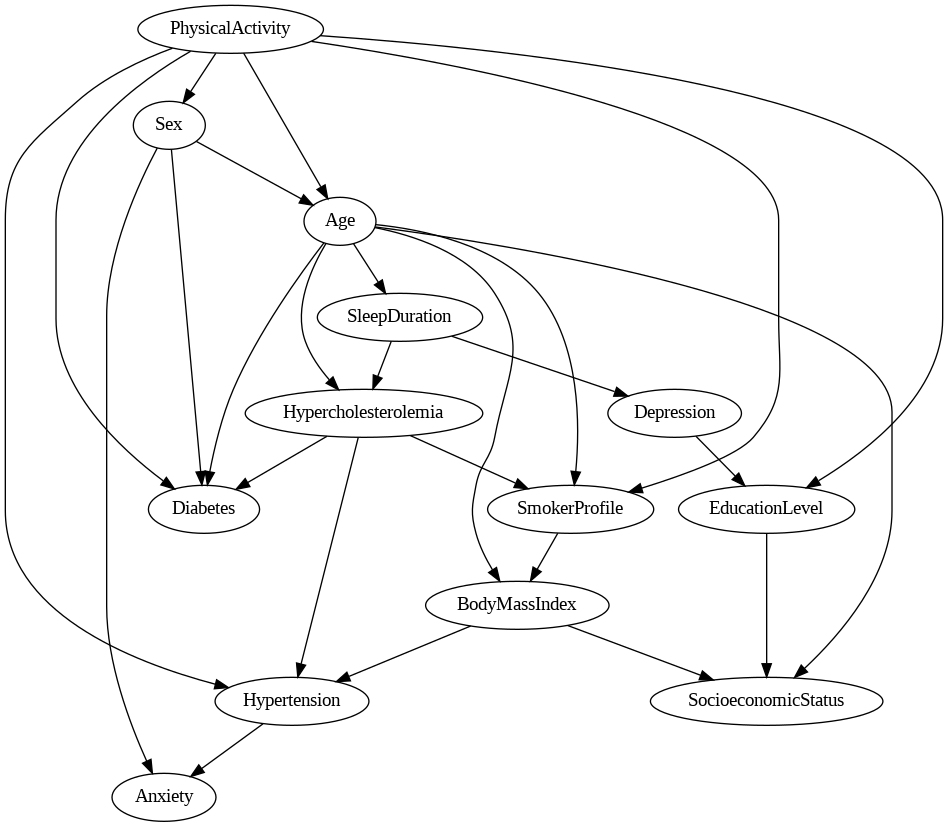

In [7]:
# pygraphviz

from IPython.display import Image, display
from pgmpy.estimators import HillClimbSearch, BDeuScore, MaximumLikelihoodEstimator
from pgmpy.models import BayesianNetwork
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from pgmpy.base import DAG

# Load the data
data = pd.read_csv('cardiovascular_train.csv')

lista = [('Sex', 'Age'), ('Sex', 'Anxiety'), ('Sex', 'Diabetes'), ('Age', 'SocioeconomicStatus'), ('Age', 'BodyMassIndex'), ('Age', 'SmokerProfile'), ('Age', 'Diabetes'), ('Age', 'SleepDuration'), ('Age', 'Hypercholesterolemia'), ('BodyMassIndex', 'Hypertension'), ('BodyMassIndex', 'SocioeconomicStatus'), ('SmokerProfile', 'BodyMassIndex'), ('SleepDuration', 'Depression'), ('SleepDuration', 'Hypercholesterolemia'), ('Hypercholesterolemia', 'Diabetes'), ('Hypercholesterolemia', 'Hypertension'), ('Hypercholesterolemia', 'SmokerProfile'), ('EducationLevel', 'SocioeconomicStatus'), ('Hypertension', 'Anxiety'), ('PhysicalActivity', 'Hypertension'), ('PhysicalActivity', 'Age'), ('PhysicalActivity', 'SmokerProfile'), ('PhysicalActivity', 'Diabetes'), ('PhysicalActivity', 'Sex'), ('PhysicalActivity', 'EducationLevel'), ('Depression', 'EducationLevel')]

# Convert to a BayesianNetwork model and fit it to get CPDs
best_model = BayesianNetwork(lista)
best_model.fit(data, estimator=MaximumLikelihoodEstimator)

# Calculate the BDeu score (already computed during model learning)
bdeu_score = bdeu_scoring.score(best_model)
print('Edges:', best_model.edges())
print('Len of edges:', len(best_model.edges()))
print('BDeu Score:', bdeu_score)

m = best_model.to_graphviz()
img = m.draw(format='png',prog="dot")
display(Image(img))


decide on the network (connections, etc.)

**Post-Selection Analysis and Forcing Links**

After selecting x = 0.6 for the network's connection threshold, we proceeded to review the learned network structure. During this analysis, we examined the relationships (edges) between variables to ensure they made sense based on both the data and domain knowledge.

* Reviewing the Connections:
 We carefully examined all the edges to confirm that they represented meaningful relationships. Some edges, such as (give examples)
   
* Forcing Specific Links:
 In cases where the network did not capture important known relationships, we decided to enforce certain links. For example, (give examples)

* Limiting Manual Adjustments:
 While we enforced a few critical edges, we avoided over-manipulating the network. Too many manual adjustments could have led to a network that was more constructed by hand than learned from the data. Thus, we allowed the algorithm to determine most of the structure, only intervening when necessary.



## 3. Network and problem analysis.
### a) How age affects sleep duration

In [8]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(best_model)
#print(infer.query(['Age', 'SleepDuration'])) # P(Age)
print(infer.query(['SleepDuration'], evidence={'Age':'18-24'}))
print(infer.query(['SleepDuration'], evidence={'Age':'24-34'}))
print(infer.query(['SleepDuration'], evidence={'Age':'34-44'}))
print(infer.query(['SleepDuration'], evidence={'Age':'44-54'}))
print(infer.query(['SleepDuration'], evidence={'Age':'54-64'}))
print(infer.query(['SleepDuration'], evidence={'Age':'64-74'}))

+-------------------------+----------------------+
| SleepDuration           |   phi(SleepDuration) |
+=========================+======================+
| SleepDuration(6-9hours) |               1.0000 |
+-------------------------+----------------------+
| SleepDuration(<6hours)  |               0.0000 |
+-------------------------+----------------------+
| SleepDuration(>9hours)  |               0.0000 |
+-------------------------+----------------------+
+-------------------------+----------------------+
| SleepDuration           |   phi(SleepDuration) |
+=========================+======================+
| SleepDuration(6-9hours) |               0.9420 |
+-------------------------+----------------------+
| SleepDuration(<6hours)  |               0.0565 |
+-------------------------+----------------------+
| SleepDuration(>9hours)  |               0.0015 |
+-------------------------+----------------------+
+-------------------------+----------------------+
| SleepDuration           |   p

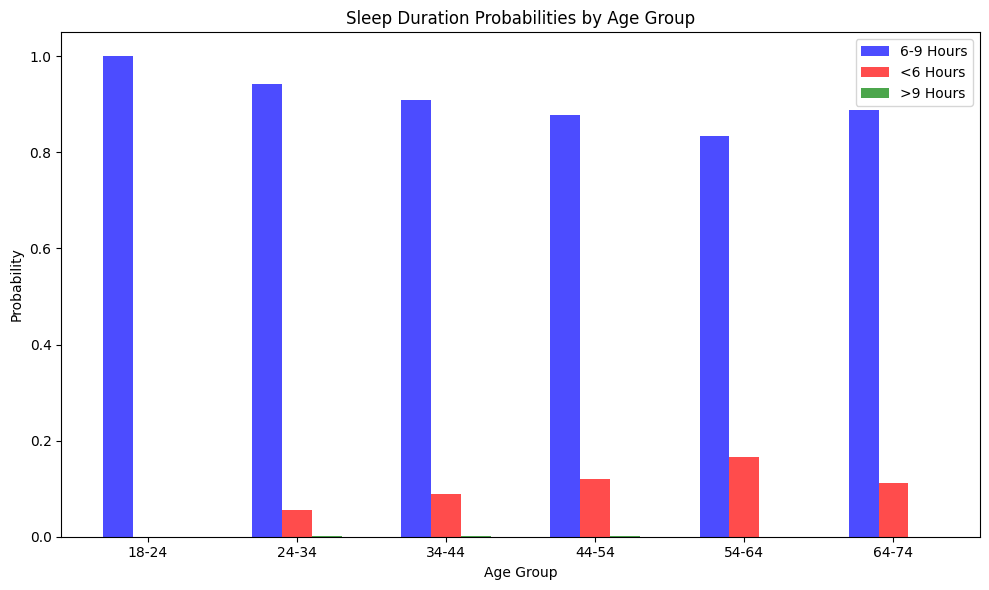

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from the user's input
ages = ['18-24', '24-34', '34-44', '44-54', '54-64', '64-74']
sleep_6_9 = [1.0000, 0.9420, 0.9100, 0.8772, 0.8350, 0.8889]
sleep_less_6 = [0.0000, 0.0565, 0.0893, 0.1211, 0.1650, 0.1111]
sleep_more_9 = [0.0000, 0.0015, 0.0007, 0.0017, 0.0000, 0.0000]

x = np.arange(len(ages))  # X-axis positions

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, sleep_6_9, width=0.2, label='6-9 Hours', color='blue', alpha=0.7)
plt.bar(x, sleep_less_6, width=0.2, label='<6 Hours', color='red', alpha=0.7)
plt.bar(x + 0.2, sleep_more_9, width=0.2, label='>9 Hours', color='green', alpha=0.7)

# Labels and title
plt.xlabel('Age Group')
plt.ylabel('Probability')
plt.title('Sleep Duration Probabilities by Age Group')
plt.xticks(x, ages)
plt.legend()

# Display the graph
plt.tight_layout()
plt.show()

The relationship between age and sleep duration was explored by visualizing the probability distribution of different sleep durations (6–9 hours, less than 6 hours, and more than 9 hours) across various age groups. The following insights were observed:

* 6-9 Hours of Sleep: The majority of participants across all age groups reported sleeping 6-9 hours, with the highest probabilities observed in the younger age groups (18-24 and 24-34). As age increases, the likelihood of getting 6-9 hours of sleep slightly decreases, but it remains the dominant sleep category.
* Less Than 6 Hours of Sleep: This category sees an increase in probability as age rises, with older participants (44-54, 54-64) showing higher chances of getting less than 6 hours of sleep compared to younger participants. This suggests that younger individuals tend to maintain a more consistent sleep schedule within the recommended 6-9 hours range, while older individuals may experience more sleep disturbances or shorter sleep duration.
* More Than 9 Hours of Sleep: ????

**Interpretation:**
* The graph visually highlights that younger individuals (18-34 years old) are more likely to sleep within the ideal 6-9 hour range, while older individuals tend to have shorter sleep durations (less than 6 hours). This may reflect lifestyle, work patterns, or health-related factors that influence sleep as individuals age.



This analysis reveals a clear trend in how age influences sleep duration, with a higher probability of inadequate sleep (less than 6 hours) in older age groups and more consistent sleep patterns in younger individuals. These insights could be useful when considering how age might correlate with other health conditions, such as hypertension or diabetes, in the context of the Bayesian network.



### b) How does the smoker profile affect the three medical conditions (diabetes,hypertension and hypercholesterolemia)

In [10]:
print(infer.query(['Diabetes'],  evidence={'SmokerProfile':'Non_Smoker'}))
print(infer.query(['Diabetes'],  evidence={'SmokerProfile':'Ex_Smoker'}))
print(infer.query(['Diabetes'],  evidence={'SmokerProfile':'Smoker'}))


print(infer.query(['Hypertension'],  evidence={'SmokerProfile':'Non_Smoker'}))
print(infer.query(['Hypertension'],  evidence={'SmokerProfile':'Ex_Smoker'}))
print(infer.query(['Hypertension'],  evidence={'SmokerProfile':'Smoker'}))

print(infer.query(['Hypercholesterolemia'],  evidence={'SmokerProfile':'Non_Smoker'}))
print(infer.query(['Hypercholesterolemia'],  evidence={'SmokerProfile':'Ex_Smoker'}))
print(infer.query(['Hypercholesterolemia'],  evidence={'SmokerProfile':'Smoker'}))

+---------------+-----------------+
| Diabetes      |   phi(Diabetes) |
+===============+=================+
| Diabetes(No)  |          0.9551 |
+---------------+-----------------+
| Diabetes(Yes) |          0.0449 |
+---------------+-----------------+
+---------------+-----------------+
| Diabetes      |   phi(Diabetes) |
+===============+=================+
| Diabetes(No)  |          0.9527 |
+---------------+-----------------+
| Diabetes(Yes) |          0.0473 |
+---------------+-----------------+
+---------------+-----------------+
| Diabetes      |   phi(Diabetes) |
+===============+=================+
| Diabetes(No)  |          0.9520 |
+---------------+-----------------+
| Diabetes(Yes) |          0.0480 |
+---------------+-----------------+
+-------------------+---------------------+
| Hypertension      |   phi(Hypertension) |
+===================+=====================+
| Hypertension(No)  |              0.8165 |
+-------------------+---------------------+
| Hypertension(Yes) |   

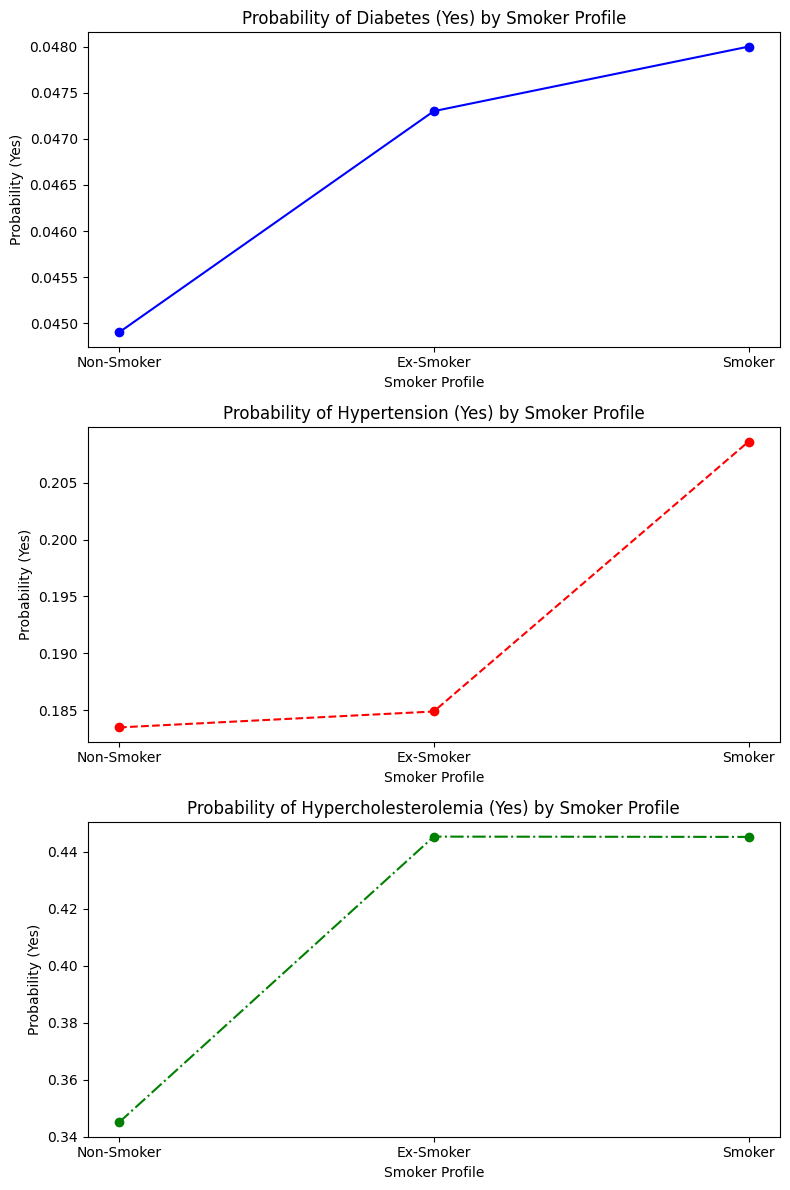

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from the user's input
smoker_profiles = ['Non-Smoker', 'Ex-Smoker', 'Smoker']
diabetes_yes = [0.0449, 0.0473, 0.0480]
hypertension_yes = [0.1835, 0.1849, 0.2086]
hypercholesterolemia_yes = [0.3450, 0.4454, 0.4453]


x = np.arange(len(smoker_profiles))  # X-axis positions

# Create separate graphs for each disease
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Diabetes
axs[0].plot(x, diabetes_yes, marker='o', color='blue', linestyle='-')
axs[0].set_title('Probability of Diabetes (Yes) by Smoker Profile')
axs[0].set_xlabel('Smoker Profile')
axs[0].set_ylabel('Probability (Yes)')
axs[0].set_xticks(x)
axs[0].set_xticklabels(smoker_profiles)

# Hypertension
axs[1].plot(x, hypertension_yes, marker='o', color='red', linestyle='--')
axs[1].set_title('Probability of Hypertension (Yes) by Smoker Profile')
axs[1].set_xlabel('Smoker Profile')
axs[1].set_ylabel('Probability (Yes)')
axs[1].set_xticks(x)
axs[1].set_xticklabels(smoker_profiles)

# Hypercholesterolemia
axs[2].plot(x, hypercholesterolemia_yes, marker='o', color='green', linestyle='-.')
axs[2].set_title('Probability of Hypercholesterolemia (Yes) by Smoker Profile')
axs[2].set_xlabel('Smoker Profile')
axs[2].set_ylabel('Probability (Yes)')
axs[2].set_xticks(x)
axs[2].set_xticklabels(smoker_profiles)

# Adjust layout
plt.tight_layout()
plt.show()

**Analysis of Smoker Profile and Its Impact on Medical Conditions**

The impact of smoker profile (Non-Smoker, Ex-Smoker, and Smoker) on the likelihood of developing diabetes, hypertension, and hypercholesterolemia was explored by visualizing the probability of each condition across different smoker profiles. The following insights were derived from the plots:

**1. Diabetes:**
* The values are close to 0.05 for all three categories, indicating that smoking and ex-smoking do not significantly affect the likelihood of diabetes, at least based on this dataset.

**2. Hypertension:**
* For hypertension, there is a noticeable increase in the probability of the condition among Smokers compared to Non-Smokers and Ex-Smokers. The probability of hypertension (Yes) is approximately 0.18 for Non-Smokers and Ex-Smokers, but it rises to around 0.21 for Smokers. This suggests that smoking may increase the risk of developing hypertension, aligning with established medical knowledge that smoking is a major risk factor for high blood pressure.

**3. Hypercholesterolemia:**
* Hypercholesterolemia (high cholesterol) also shows an interesting trend. The probability of having hypercholesterolemia is higher for Smokers and Ex-Smokers compared to Non-Smokers, with values of around 0.45 for both groups versus approximately 0.35 for Non-Smokers. This indicates that smoking and having a history of smoking could be linked to a higher likelihood of developing high cholesterol.


**Interpretation:**
* Smoking and Ex-Smoking appear to be associated with higher probabilities of developing hypertension and hypercholesterolemia, but not significantly with diabetes in this dataset.
* The Non-Smoker category consistently shows lower probabilities for both hypertension and hypercholesterolemia, supporting the well-established idea that smoking increases the risks for cardiovascular and metabolic conditions.
* Ex-Smokers show probabilities closer to Smokers than to Non-Smokers for both hypertension and hypercholesterolemia, which may reflect long-term health effects even after quitting smoking.


### c) How body mass index affects the three medical conditions

In [12]:
print(infer.query(['Hypertension'],  evidence={'BodyMassIndex':'Normal'}))
print(infer.query(['Hypertension'],  evidence={'BodyMassIndex':'Overweight'}))
print(infer.query(['Hypertension'],  evidence={'BodyMassIndex':'Obese'}))
print(infer.query(['Hypertension'],  evidence={'BodyMassIndex':'Underweight'}))

print(infer.query(['Hypercholesterolemia'],  evidence={'BodyMassIndex':'Normal'}))
print(infer.query(['Hypercholesterolemia'],  evidence={'BodyMassIndex':'Overweight'}))
print(infer.query(['Hypercholesterolemia'],  evidence={'BodyMassIndex':'Obese'}))
print(infer.query(['Hypercholesterolemia'],  evidence={'BodyMassIndex':'Underweight'}))

+-------------------+---------------------+
| Hypertension      |   phi(Hypertension) |
+===================+=====================+
| Hypertension(No)  |              0.8026 |
+-------------------+---------------------+
| Hypertension(Yes) |              0.1974 |
+-------------------+---------------------+
+-------------------+---------------------+
| Hypertension      |   phi(Hypertension) |
+===================+=====================+
| Hypertension(No)  |              0.8442 |
+-------------------+---------------------+
| Hypertension(Yes) |              0.1558 |
+-------------------+---------------------+
+-------------------+---------------------+
| Hypertension      |   phi(Hypertension) |
+===================+=====================+
| Hypertension(No)  |              0.7766 |
+-------------------+---------------------+
| Hypertension(Yes) |              0.2234 |
+-------------------+---------------------+
+-------------------+---------------------+
| Hypertension      |   phi(Hype

## 4. Classification of the three medical conditions

In [14]:
from sklearn.metrics import classification_report

# get test label and data
test = pd.read_csv('cardiovascular_test.csv')

Hypercholesterolemia_Original = test['Hypercholesterolemia']
x_test = test.drop(columns=['Hypercholesterolemia'])
predictions = best_model.predict(x_test)

print(classification_report(Hypercholesterolemia_Original,predictions))

  0%|          | 0/704 [00:00<?, ?it/s]

              precision    recall  f1-score   support

          No       0.71      0.85      0.78       795
         Yes       0.64      0.44      0.52       487

    accuracy                           0.69      1282
   macro avg       0.68      0.64      0.65      1282
weighted avg       0.69      0.69      0.68      1282



In [15]:
from sklearn.metrics import classification_report

# get test label and data
test = pd.read_csv('cardiovascular_test.csv')

Hypertension_Original = test['Hypertension']
x_test = test.drop(columns=['Hypertension'])
predictions = best_model.predict(x_test)

print(classification_report(Hypertension_Original,predictions))

  0%|          | 0/741 [00:00<?, ?it/s]

              precision    recall  f1-score   support

          No       0.83      0.99      0.90      1052
         Yes       0.61      0.07      0.13       230

    accuracy                           0.83      1282
   macro avg       0.72      0.53      0.52      1282
weighted avg       0.79      0.83      0.76      1282



In [16]:
from sklearn.metrics import classification_report

# get test label and data
test = pd.read_csv('cardiovascular_test.csv')

Diabetes_Original = test['Diabetes']
x_test = test.drop(columns=['Diabetes'])
predictions = best_model.predict(x_test)

print(classification_report(Diabetes_Original,predictions))

  0%|          | 0/808 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

          No       0.95      1.00      0.98      1224
         Yes       0.00      0.00      0.00        58

    accuracy                           0.95      1282
   macro avg       0.48      0.50      0.49      1282
weighted avg       0.91      0.95      0.93      1282



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 5. Improving classification results